## The Monty Hall Problem

To learn more about, please visit: https://en.wikipedia.org/wiki/Monty_Hall_problem

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

Source: Wikipedia

**Standard assumptions:**
1. The host knows what is behind which door and does not randomly open the door
2. The host does not open the door containing the prize
3. The host doesn't open the same door picked by the guest

At the outset, the probability of opening the door containing the prize behind is 1/3 since there is only one prize and it's random (assumed no bias). Does the odd change once the host shows open one of the two other doors.

In this notebook, I am going to simulate the Monty Hall problem over a million runs to programmatically prove that the "switch" strategy is better than the "No switch" strategy. We will also visually explore the probabilities as the number of times the game is played increases

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import random

In [3]:
def binarize(num):
	#binarize function for the three doors
	if num == 1:
		return [0,0,1]
	elif num == 2:
		return [0,1,0]
	else:
		return [1,0,0]

In [4]:
def rand_outcome():
	# Randomize the door in which the prize is present
	#random.seed(random.randint(1,1e12))
  	outcome = random.sample([1,2,4],1)[0]
	#print ("Outcome = %d"%(outcome))
  	return binarize(outcome)

In [5]:
def user_selection():
	# Randomize the door that the user picks the first time
	#seed = random.randint(1,1e12)
	sel = random.sample([0,1,2],1)[0]
	#print ("User selection = %d"%(sel))
	return sel

In [6]:
def MontyHallNoSwitch():
	# This returns the outcome (win or loss for the user under No-switch strategy)
	user_pick_int = user_selection()
	outcome = rand_outcome()
	return outcome[user_pick_int]

In [7]:
def MontyHallSwitch():
	# This returns the outcome (win or loss for the user under Switch strategy)
	user_pick_int = user_selection()
	outcome = rand_outcome()
	# The host is going to open one of the doors other than what the guest picked
	choices = [0,1,2]
	choices.pop(user_pick_int)
	# print (choices)
	# Since the host always opens the door without the prize, the guest loses
	# the game by switching if their original choice was the correct door
	if (outcome[choices[0]] == 0 and outcome[choices[1]] == 0):
		return 0
	else:
		return 1

In [8]:
def MontyHallSimulation(iter=10000):
	winsNoSwitch, winsSwitch = 0.0 , 0.0
	for i in range(0,iter):
		winsNoSwitch = winsNoSwitch + MontyHallNoSwitch()
		winsSwitch = winsSwitch + MontyHallSwitch()
		if i == 0:
			print ("Probability of winning after N iterations  NoSwitch Stategy  Switch Strategy")
		elif i%100000 == 0:
			print ("Prob. of winning after {0} iterations  {1}  {2}".format(i,winsNoSwitch/i, winsSwitch/i))
	return (winsNoSwitch/iter, winsSwitch/iter)

Driver program below

In [9]:
winProbNoSwitch, winProbSwitch = MontyHallSimulation(1000000)
print ("Probability of winning without switching is {}".format(float(winProbNoSwitch)))
print ("Probability of winning with switching is {}".format(float(winProbSwitch)))

Probability of winning after N iterations  NoSwitch Stategy  Switch Strategy
Prob. of winning after 100000 iterations  0.33272  0.66584
Prob. of winning after 200000 iterations  0.33157  0.66605
Prob. of winning after 300000 iterations  0.33185  0.6652933333333333
Prob. of winning after 400000 iterations  0.3324975  0.665165
Prob. of winning after 500000 iterations  0.332772  0.666
Prob. of winning after 600000 iterations  0.33282833333333334  0.66658
Prob. of winning after 700000 iterations  0.33271428571428574  0.66679
Prob. of winning after 800000 iterations  0.3328725  0.6668075
Prob. of winning after 900000 iterations  0.33281333333333335  0.6669033333333333
Probability of winning without switching is 0.332808
Probability of winning with switching is 0.667162


As we can see, the probability of winning if you don't switch remains at 33.3% - unchanged even after the host opens one of the doors. Whereas by switching no matter what, the long run probability shoots up to 66.7%

In [10]:
def MontyHallSimulationData(iter=10000):
    winsNoSwitch, winsSwitch = 0.0 , 0.0
    switchWinsProb = []
    noswitchWinsProb = []
    for i in range(0,iter):
        winsNoSwitch = winsNoSwitch + MontyHallNoSwitch()
        noswitchWinsProb.append(winsNoSwitch/(i+1))
        winsSwitch = winsSwitch + MontyHallSwitch()
        switchWinsProb.append(winsSwitch/(i+1))
    return (noswitchWinsProb, switchWinsProb)

In [11]:
noswitchWinsProb, switchWinsProb = MontyHallSimulationData(10000)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Let's plot the win probability after each iteration to see at what it settles down to an equilibrium

In [13]:
df1 = pd.DataFrame({'iter':range(10000),'winProb':noswitchWinsProb})
df2 = pd.DataFrame({'iter':range(10000),'winProb':switchWinsProb})

In [14]:
df1.tail()

,iter,winProb
9995,9995,0.335334
9996,9996,0.335401
9997,9997,0.335367
9998,9998,0.335334
9999,9999,0.335300


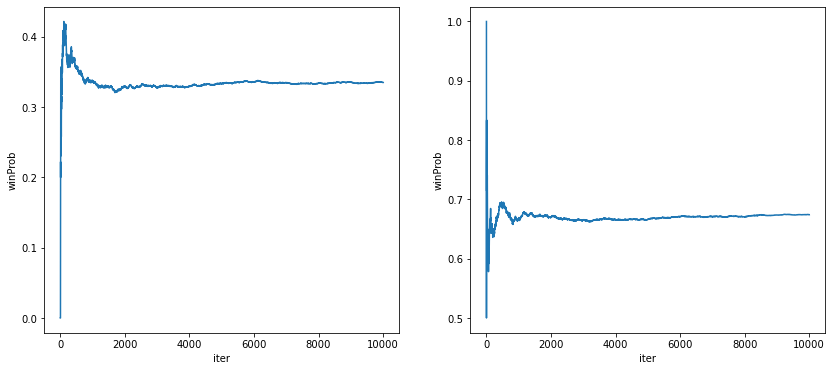

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.lineplot(x='iter',y='winProb',data=df1)
plt.subplot(1,2,2)
sns.lineplot(x='iter',y='winProb',data=df2)

## We see that by the time we play the game 2000 times or more, the probability has almost settled